<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/regressao_linear_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from babel import numbers

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fatec/Aprendizado de Maquina/EXERCICIO 2 - Regressao Linear - DATASET.csv")

df.head()

,Casa,Área (m²),Preço (R$),Quarto,Banheiro,Idade (anos),Localização,Condição
0,1,100,500000,3,2,10,Centro,Boa
1,2,120,600000,2,1,5,Zona Sul,Nova
2,3,150,800000,4,3,20,Zona Norte,Reformada
3,4,180,1000000,5,4,30,Centro,Ótima
4,5,220,1200000,4,2,15,Zona Oeste,Boa


In [ ]:
df.describe()

,Casa,Área (m²),Preço (R$),Quarto,Banheiro,Idade (anos)
count,50.00000,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,25.50000,305.720000,2.020400e+06,4.620000,2.860000,17.520000
std,14.57738,174.604514,1.209275e+06,1.323107,1.030356,8.119616
min,1.00000,85.000000,5.000000e+05,2.000000,1.000000,4.000000
25%,13.25000,146.250000,8.475000e+05,4.000000,2.000000,10.250000
50%,25.50000,270.000000,1.895000e+06,5.000000,3.000000,16.500000
75%,37.75000,480.000000,3.175000e+06,6.000000,4.000000,22.750000
max,50.00000,570.000000,3.800000e+06,7.000000,5.000000,40.000000


In [ ]:
area, price = df[['Área (m²)']], df[['Preço (R$)']]

print(area.head())
print(price.head())

   Área (m²)
0        100
1        120
2        150
3        180
4        220
   Preço (R$)
0      500000
1      600000
2      800000
3     1000000
4     1200000


In [ ]:
train_area, test_area, train_price, test_price = train_test_split(area, price, test_size=0.25, random_state=7)

print(type(train_area))

<class 'pandas.core.frame.DataFrame'>


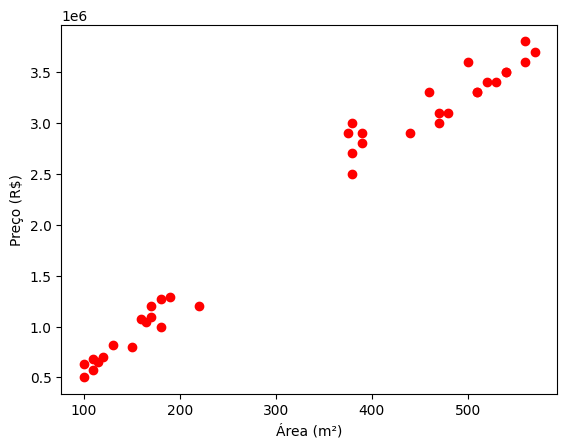

In [ ]:
plt.scatter(train_area, train_price, color='red')
plt.xlabel("Área (m²)")
plt.ylabel("Preço (R$)")
pl.show()

In [ ]:
model = linear_model.LinearRegression()

model.fit(train_area, train_price)

print('Modelo de regressão linear: ', model.coef_[0][0], 'x +', model.intercept_[0] )

Modelo de regressão linear:  6845.848404872208 x + -69326.52946081012


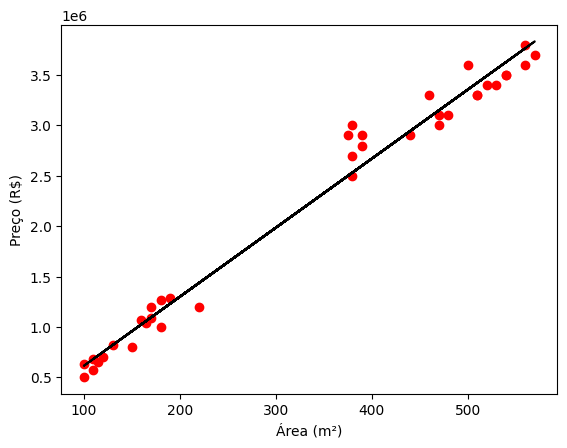

In [ ]:
plt.scatter(train_area, train_price, color='red')
plt.plot(train_area, model.coef_[0][0] * train_area + model.intercept_[0], '#000')
plt.xlabel("Área (m²)")
plt.ylabel("Preço (R$)")
plt.show()

In [ ]:
price_predict = model.predict(test_area)

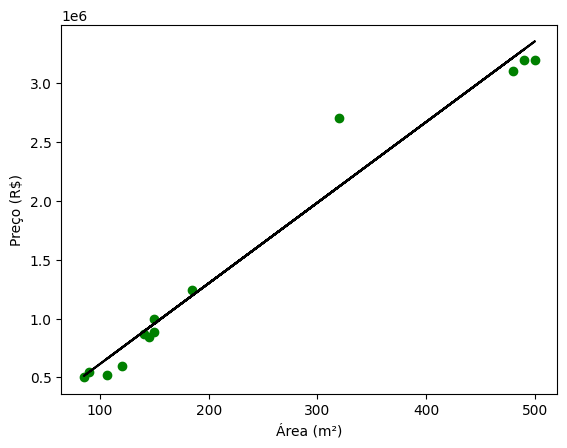

In [ ]:
plt.scatter(test_area, test_price, color='green')
plt.plot(test_area, model.coef_[0][0] * test_area + model.intercept_[0], '#000')
plt.xlabel("Área (m²)")
plt.ylabel("Preço (R$)")
plt.show()

In [ ]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((price_predict - test_price)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(test_price, price_predict))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(test_price, price_predict))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(test_price, price_predict)))
print("R2-score: %.2f" % r2_score(price_predict, test_price))

Soma dos Erros ao Quadrado (SSE): 436717025125 
Erro Quadrático Médio (MSE): 33593617317.33
Erro Médio Absoluto (MAE): 114893.10
Raiz do Erro Quadrático Médio (RMSE): 183285.62 
R2-score: 0.97


In [ ]:
values = [600, 700, 900]
entrada = [[values]]
price_predict = model.predict(entrada)[0]
print(price_predict)

,Área (m²)
13,150
15,320
22,140
42,150
30,106
27,500
1,120
20,90
10,85
36,480


In [ ]:
print("Predição do valor do imóvel em R$ com base na sua área em m²\n")

while True:
  area_to_predict = float(input("Digite a área do imóvel (m²) para previsão (ou 0 para sair): "))

  if area_to_predict == 0:
    break;

  values = [[area_to_predict]]
  predict = model.predict(values)[0]
  predict_formated = predict.astype(str)[0]
  predict_formated = float(predict_formated)
  print(f"O preço previsto para um imóvel com {area_to_predict}m² é: {numbers.format_currency(predict_formated,'BRL', locale='pt_BR')}")

Predição do valor do imóvel em R$ com base na sua área em m²

Digite a área do imóvel (m²) para previsão (ou 0 para sair): 300


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


O preço previsto para um imóvel com 300.0m² é: R$ 1.984.427,99
Digite a área do imóvel (m²) para previsão (ou 0 para sair): 160


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


O preço previsto para um imóvel com 160.0m² é: R$ 1.026.009,22
Digite a área do imóvel (m²) para previsão (ou 0 para sair): 200


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


O preço previsto para um imóvel com 200.0m² é: R$ 1.299.843,15
Digite a área do imóvel (m²) para previsão (ou 0 para sair): 0


In [17]:
a = 6845.848404872208
b = -69326.52946081012

values_predict = [327 , 111 , 219, 741, 363, 35, 42]

for area in values_predict:
  predict = a * area + b
  print(f"O preço previsto para um imóvel com {area}m² é: {numbers.format_currency(predict,'BRL', locale='pt_BR')}")

O preço previsto para um imóvel com 327m² é: R$ 2.169.265,90
O preço previsto para um imóvel com 111m² é: R$ 690.562,64
O preço previsto para um imóvel com 219m² é: R$ 1.429.914,27
O preço previsto para um imóvel com 741m² é: R$ 5.003.447,14
O preço previsto para um imóvel com 363m² é: R$ 2.415.716,44
O preço previsto para um imóvel com 35m² é: R$ 170.278,16
O preço previsto para um imóvel com 42m² é: R$ 218.199,10
